In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
# @title VISUALIZING DATA

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

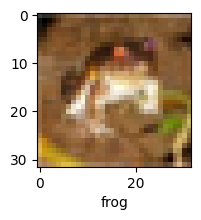

In [11]:
plot_sample(X_train, y_train, 0)

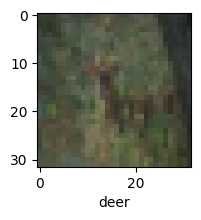

In [12]:
plot_sample(X_train, y_train, 10)

In [13]:
# @title NORMALIZING TRAINING DATA

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [16]:
# @title BUILDING CNN

In [17]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [18]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5059 - accuracy: 0.4572 - val_loss: 1.2218 - val_accuracy: 0.5682
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1501 - accuracy: 0.5989 - val_loss: 1.1243 - val_accuracy: 0.5979
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0122 - accuracy: 0.6486 - val_loss: 1.0175 - val_accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9317 - accuracy: 0.6765 - val_loss: 0.9583 - val_accuracy: 0.6646
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8645 - accuracy: 0.6984 - val_loss: 1.0007 - val_accuracy: 0.6560
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8143 - accuracy: 0.7176 - val_loss: 0.9488 - val_accuracy: 0.6745
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7637 - accuracy: 0.7364 - val_loss: 0.9404 -

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9259 - accuracy: 0.6981


[0.9258779287338257, 0.6980999708175659]

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [22]:
# @title PREDICTING DATA

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[1.1176063e-04, 8.0143382e-06, 6.3052180e-04, 9.8397303e-01,
        4.8972714e-05, 1.3221334e-02, 9.5001154e-04, 1.6626949e-05,
        1.0244955e-03, 1.5113707e-05],
       [1.2279482e-04, 2.0648591e-02, 8.8922792e-07, 2.3347351e-07,
        3.1325562e-09, 2.9384193e-08, 5.7527254e-09, 3.3776690e-09,
        9.7921592e-01, 1.1533201e-05],
       [8.3053350e-02, 6.6184320e-02, 5.2042878e-03, 5.7020751e-03,
        3.0401393e-03, 9.8152820e-04, 1.4021131e-03, 1.4950967e-02,
        7.9615510e-01, 2.3326097e-02],
       [7.9448462e-01, 2.5557810e-02, 6.5039158e-02, 3.4464642e-02,
        4.0058456e-02, 3.0778362e-03, 1.1703330e-02, 4.9877068e-04,
        2.3560811e-02, 1.5545739e-03],
       [3.1143991e-06, 2.4452522e-06, 9.6116839e-03, 3.7137203e-02,
        4.1396577e-02, 4.8658969e-03, 9.0651578e-01, 9.5416199e-06,
        4.5736771e-04, 3.9138212e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

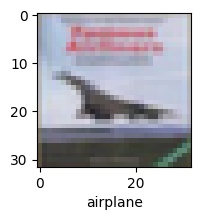

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [31]:
# @title ACCURACY GRAPH

313/313 - 3s - loss: 0.9259 - accuracy: 0.6981 - 3s/epoch - 11ms/step


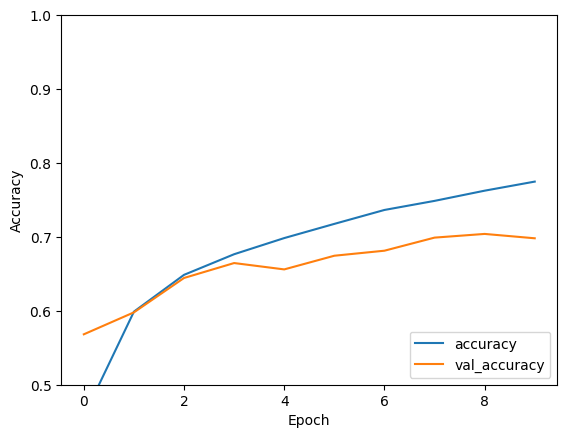

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test,  y_test, verbose=2)